In [1]:
from htke.load_data import *
from htke.process_ir_data import *
from htke.load_conditions import *
from htke.spka import *
from htke.rpka import *
pd.options.mode.chained_assignment = None  # default='warn' stops the slice error

### Go to directory

In [2]:
%pwd
%cd ir_data/GL-06-53-4

C:\Users\Paul Dingwall\Documents\github\htke\ir_data\GL-06-53-4


### Load Raw Data

<AxesSubplot:xlabel='Relative Time'>

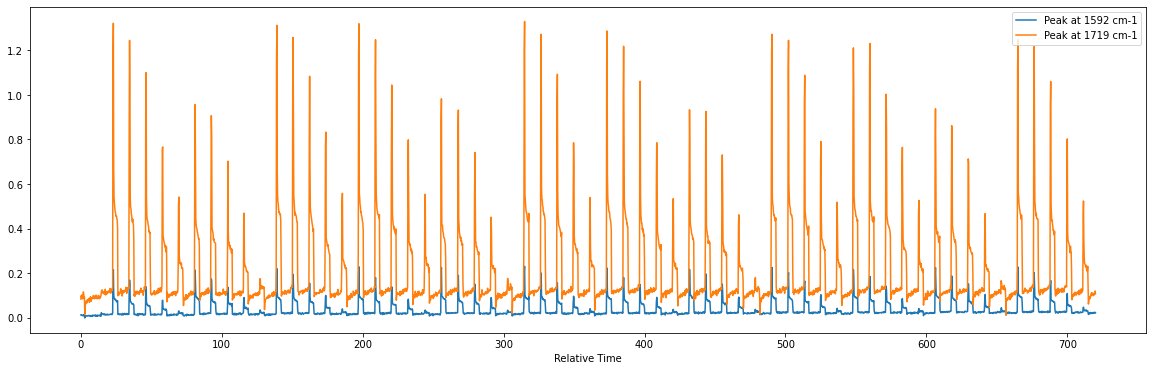

In [3]:
# Instantiate class
Data()

# Load data to dataframe
ir_data = Data.read()

# Visualise the data
Data.plot(ir_data)

#ir_data

### Find the Peaks in the Raw Data

In [4]:
# List all the wavelengths observed
print([col for col in ir_data.columns if 'Peak' in col])

['Peak at 1592 cm-1', 'Peak at 1719 cm-1']


In [5]:
# Choose peak
peak_of_interest = 'Peak at 1592 cm-1'

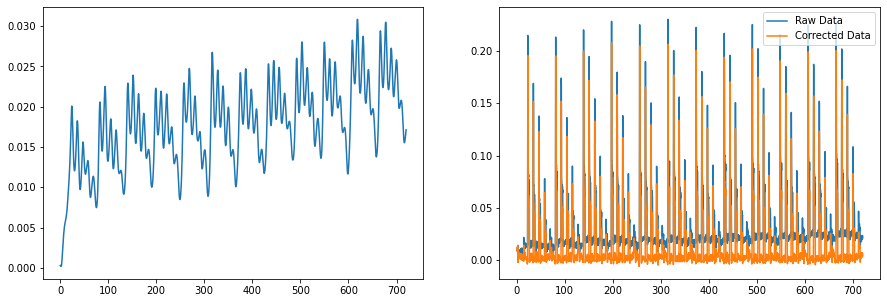

In [6]:
# Correct the baseline
correction = Data.baseline_correction(ir_data[peak_of_interest], peak_of_interest)
ir_data[peak_of_interest] = ir_data[peak_of_interest] - correction

# Plot it to see
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.plot(ir_data['Relative Time'], correction)
ax2.plot(ir_data['Relative Time'], ir_data[peak_of_interest] + correction, label = 'Raw Data')
ax2.plot(ir_data['Relative Time'], ir_data[peak_of_interest], label = 'Corrected Data')
ax2.legend()

In [7]:
# Instantiate class
peaks = Peaks(ir_data)

# Auto find prominence and height to match number of conditions
prominence, no_reactions, points_per_reaction = peaks.auto_prom(peak_of_interest)
height = peaks.auto_height(peak_of_interest)
residence_time = peaks.auto_area(peak_of_interest, prominence, no_reactions, points_per_reaction)

print('There are', no_reactions, 'reactions with', points_per_reaction, 'points per reaction')
print('Prominence threshold =', np.round(prominence, 4))
print('Height threshold =', np.round(height, 4))
print('Residence time =', np.round(residence_time, 2))

There are 12 reactions with 5 points per reaction
Prominence threshold = 0.0164
Height threshold = 1.0
Residence time = 1.5


In [8]:
# Set some variables
time_adjust_before = -1
time_adjust_after = 4

# For loop to see all areas - Makes lots of plots, can take a while
# for var in range(0, no_reactions * points_per_reaction):
#     peaks.exp_area_sp(prominence, residence_time, peak_of_interest, time_adjust_before, time_adjust_after, var)
#     print(var)

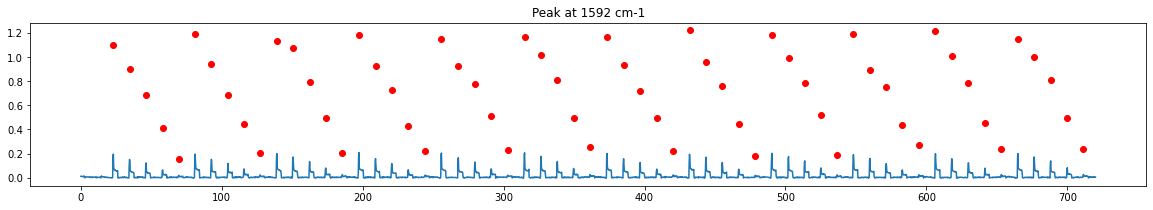

In [14]:
## PROMINENCE: Determine the peak prominences of a single wavelength
#processed_ir_data = peaks.prominence(prominence, peak_of_interest)

## EXP AREA: Determine the experimental areas of a single wavelength
processed_ir_data = peaks.exp_area(prominence, residence_time, peak_of_interest, time_adjust_before, time_adjust_after)

## Visualise which peaks have been picked - single peak
peaks.plot(processed_ir_data, peak_of_interest)

### Read experimental conditions and smooth data

In [16]:
Conditions()
experimental_data = Conditions.read(processed_ir_data)
#experimental_data

Inputs seem good: IR Datapoints =  60 , Number of conditions =  60


In [17]:
# This is new code
# Apply t0 correction
experimental_data = Conditions.t0_correction(experimental_data, no_reactions, points_per_reaction)
experimental_data

# Apply linear correction
experimental_data = Conditions.linear_correction(experimental_data)
experimental_data

,Experiment,A,B,C,[A]0,[B]0,[C]0,Initial Conv,Interval Size,tR (min),SPKA,Relative Time,Peak Property,Method,Raw Peak Property
0,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,0,23.183333,1.173646,experimental area,1.173646
1,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,0,34.683333,0.884842,experimental area,0.897914
2,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,20,46.433333,0.700858,experimental area,0.688811
3,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,50,58.183333,0.424880,experimental area,0.414117
4,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,80,69.683333,0.148903,experimental area,0.158642
5,Exp1 - R2,A1,B1,C1,0.1,0.10,0.02,20.0,30.0,11.4,0,81.183333,1.173646,experimental area,1.173646
6,Exp1 - R2,A1,B1,C1,0.1,0.10,0.02,20.0,30.0,11.4,0,92.683333,0.908878,experimental area,0.943631
7,Exp1 - R2,A1,B1,C1,0.1,0.10,0.02,20.0,30.0,11.4,20,104.433333,0.727885,experimental area,0.686344
8,Exp1 - R2,A1,B1,C1,0.1,0.10,0.02,20.0,30.0,11.4,50,115.933333,0.456396,experimental area,0.446802
9,Exp1 - R2,A1,B1,C1,0.1,0.10,0.02,20.0,30.0,11.4,80,127.433333,0.184908,experimental area,0.201289


# def linear_correction()

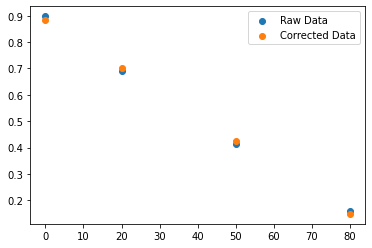

Exp1 - R1


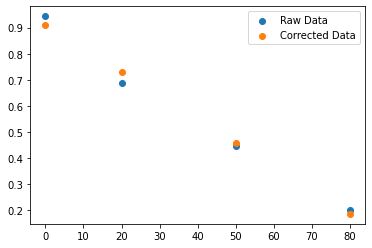

Exp1 - R2


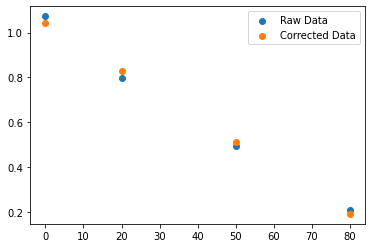

Exp1 - R3


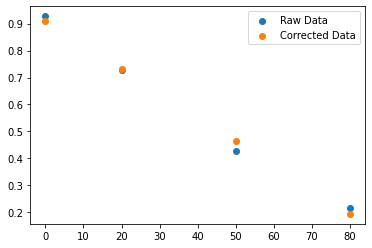

Exp1 - R4


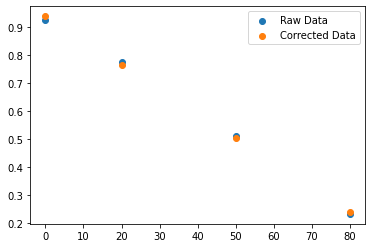

Exp1 - R5


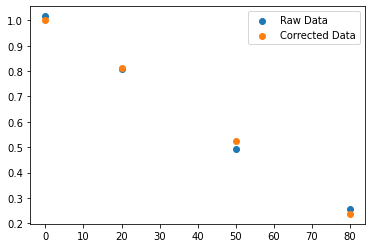

Exp1 - R6


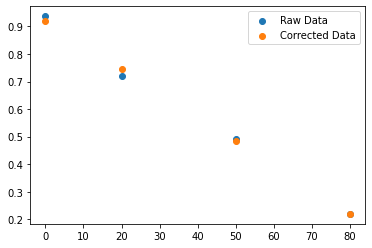

Exp1 - R7


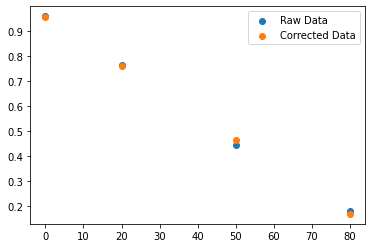

Exp1 - R8


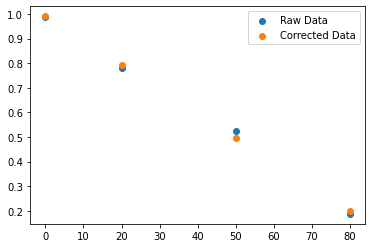

Exp1 - R9


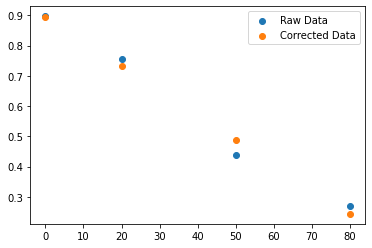

Exp1 - R10


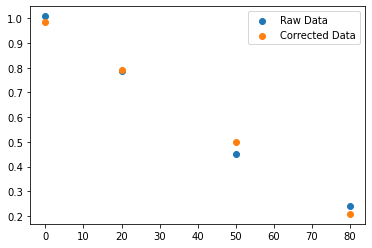

Exp1 - R11


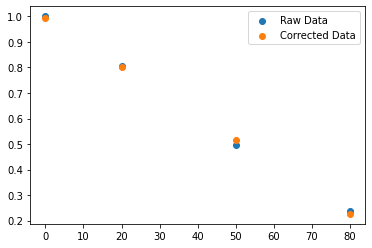

Exp1 - R12


,Experiment,A,B,C,[A]0,[B]0,[C]0,Initial Conv,Interval Size,tR (min),SPKA,Relative Time,Peak Property,Method,Raw Peak Property
0,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,0,23.183333,1.100780,experimental area,1.100780
1,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,0,34.683333,0.884842,experimental area,0.897914
2,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,20,46.433333,0.700858,experimental area,0.688811
3,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,50,58.183333,0.424880,experimental area,0.414117
4,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,80,69.683333,0.148903,experimental area,0.158642
0,Exp1 - R2,A1,B1,C1,0.1,0.10,0.02,20.0,30.0,11.4,0,81.183333,1.191064,experimental area,1.191064
1,Exp1 - R2,A1,B1,C1,0.1,0.10,0.02,20.0,30.0,11.4,0,92.683333,0.908878,experimental area,0.943631
2,Exp1 - R2,A1,B1,C1,0.1,0.10,0.02,20.0,30.0,11.4,20,104.433333,0.727885,experimental area,0.686344
3,Exp1 - R2,A1,B1,C1,0.1,0.10,0.02,20.0,30.0,11.4,50,115.933333,0.456396,experimental area,0.446802
4,Exp1 - R2,A1,B1,C1,0.1,0.10,0.02,20.0,30.0,11.4,80,127.433333,0.184908,experimental area,0.201289


In [56]:
# Find unique reaction numbers
reaction_list = experimental_data['Experiment'].unique()

df = []
for var in reaction_list:

    # Find a single experiment
    tmp = experimental_data[experimental_data['Experiment'] == var].reset_index(drop = True)

    # Define x and y - without the first point which is the t0
    x = tmp['SPKA'].astype(float)[1:]
    y = tmp['Peak Property'][1:]

    # Find linear fit
    a,b = np.polyfit(x, y, 1)

    # Create the smoothed y data
    best_fit_line = []
    best_fit_line = a * x + b

    # Find t0 point
    t0 = pd.Series(experimental_data[experimental_data['Experiment'] == var]['Peak Property'].iloc[0])

    # Add the t0 and first point back in
    best_fit_line = pd.concat([t0, best_fit_line])

    # Add to dataframe
    tmp['Raw Peak Property'] = tmp['Peak Property']
    tmp['Peak Property'] = best_fit_line

    # Append to list
    df.append(tmp)
    
    # Just to check here
    plt.scatter(tmp['SPKA'][1:], tmp['Raw Peak Property'][1:], label = 'Raw Data')
    plt.scatter(tmp['SPKA'][1:], tmp['Peak Property'][1:], label = 'Corrected Data')
    plt.legend()
    plt.show()
    print(var)
    
thing = pd.concat(df)
thing

A nicer plotting function

In [ ]:
# Find unique reaction numbers
reaction_list = experimental_data['Experiment'].unique()

# To define!!
points_per_system = 5
reactions_per_system = 3

# Find the number of systems - always assuming three reactions pers system
number_of_systems = len(reaction_list) / reactions_per_system
number_of_systems

In [ ]:
fig, ax = plt.subplots(int(number_of_systems), int(reactions_per_system), figsize = (15,15))
fig.tight_layout(w_pad = 5, h_pad = 5) # Makes spacing better

for var_row in range(0, int(number_of_systems), 1):

    # Create a list of the rows in which new systems start, to be use in iloc based slicing
    starting_point = [var for var in range(0, len(experimental_data), (points_per_system) * reactions_per_system)]

    # Which system are we finding? Determined by function parameter.
    var = starting_point[var_row]

    # Create dataframe of individual system, all relative to the starting point
    tmp = experimental_data.iloc[var : var + points_per_system * reactions_per_system, :].reset_index(drop = True)

    # Plot first column - still includes t0 so slice must start at +1 for each row
    ax[var_row, 0].scatter(tmp['SPKA'][1 : points_per_system], 
                           tmp['Raw Peak Property'][1 : points_per_system], label = 'Uncorrected Raw Data')
    ax[var_row, 0].scatter(tmp['SPKA'][1 : points_per_system], 
                           tmp['Peak Property'][1 : points_per_system], label = 'Corrected Data')


    # Plot second column
    ax[var_row, 1].scatter(tmp['SPKA'][points_per_system + 1 : 2 * points_per_system], 
                           tmp['Raw Peak Property'][points_per_system + 1 : 2 * points_per_system], label = 'Uncorrected Raw Data')
    ax[var_row, 1].scatter(tmp['SPKA'][points_per_system + 1 : 2 * points_per_system], 
                           tmp['Peak Property'][points_per_system + 1 : 2 * points_per_system], label = 'Corrected Data')

    # Plot third column
    ax[var_row, 2].scatter(tmp['SPKA'][2 * points_per_system + 1 : 3 * points_per_system], 
                           tmp['Raw Peak Property'][2 * points_per_system + 1 : 3  * points_per_system], label = 'Uncorrected Raw Data')
    ax[var_row, 2].scatter(tmp['SPKA'][points_per_system + 1 : 2 * points_per_system], 
                           tmp['Peak Property'][2 * points_per_system + 1 : 3 * points_per_system], label = 'Corrected Data')

    # Set Titles
    ax[var_row, 0].set_title(str(tmp['Experiment'][0]))
    ax[var_row, 1].set_title(str(tmp['Experiment'][points_per_system]))
    ax[var_row, 2].set_title(str(tmp['Experiment'][2 * points_per_system]))

    # Set labels
    ax[var_row, 0].set_ylabel('Peak Property')
    ax[var_row, 0].set_xlabel('SPKA Conversion')

    ax[var_row, 1].set_ylabel('Peak Property')
    ax[var_row, 1].set_xlabel('SPKA Conversion')

    ax[var_row, 2].set_ylabel('Peak Property')
    ax[var_row, 2].set_xlabel('SPKA Conversion')

    # Add legends
    ax[var_row, 0].legend()
    ax[var_row, 1].legend()
    ax[var_row, 2].legend()

In [171]:
var = reaction_list[1]

df=[]

# Find a single experiment
tmp = experimental_data[experimental_data['Experiment'] == var].reset_index(drop = True)

# Define x and y - without the first point, which is the t0
x = tmp['SPKA'].astype(float)[1:]
y = tmp['Peak Property'][1:]

# Find linear fit
a, b = np.polyfit(x, y, 1)

# Create the smoothed y data
best_fit_line = []
best_fit_line = a * x + b
best_fit_line = best_fit_line.reset_index(drop = True)

In [172]:
# Find t0 point
t0 = pd.Series(experimental_data[experimental_data['Experiment'] == var]['Peak Property'].iloc[0])
t0

0    1.173646
dtype: float64

In [173]:
# Add the t0 and first point back in
best_fit_line2 = pd.concat([t0, best_fit_line]).reset_index(drop = True)
best_fit_line2

0    1.173646
1    0.908878
2    0.727885
3    0.456396
4    0.184908
dtype: float64

In [174]:
# Add to dataframe
tmp['Raw Peak Property'] = tmp['Peak Property']
tmp['Peak Property'] = best_fit_line2

# Append to list
df.append(tmp)

df

[  Experiment   A   B   C  [A]0  [B]0  [C]0  Initial Conv  Interval Size  \
 0  Exp1 - R2  A1  B1  C1   0.1   0.1  0.02          20.0           30.0   
 1  Exp1 - R2  A1  B1  C1   0.1   0.1  0.02          20.0           30.0   
 2  Exp1 - R2  A1  B1  C1   0.1   0.1  0.02          20.0           30.0   
 3  Exp1 - R2  A1  B1  C1   0.1   0.1  0.02          20.0           30.0   
 4  Exp1 - R2  A1  B1  C1   0.1   0.1  0.02          20.0           30.0   
 
    tR (min) SPKA  Relative Time  Peak Property             Method  \
 0      11.4    0      81.183333       1.173646  experimental area   
 1      11.4    0      92.683333       0.908878  experimental area   
 2      11.4   20     104.433333       0.727885  experimental area   
 3      11.4   50     115.933333       0.456396  experimental area   
 4      11.4   80     127.433333       0.184908  experimental area   
 
    Raw Peak Property  
 0           1.173646  
 1           0.943631  
 2           0.686344  
 3           0.446802  


# Move t0 correction to load_conditions.py

In [57]:
# Find unique reaction numbers
reaction_list = experimental_data['Experiment'].unique()

In [66]:
df=[]
# Create list of t0 points
df = [experimental_data[experimental_data['Experiment'] == var]['Peak Property'].iloc[0] for var in reaction_list]
df

[1.100779830687916,
 1.1910641976199412,
 1.1358875073911812,
 1.1866810980953697,
 1.1542254550045397,
 1.165276837712769,
 1.1656252126912923,
 1.2237530972938944,
 1.1824495037738747,
 1.1945708338505658,
 1.2135210331357256,
 1.149276549958848]

In [59]:
# Remove any outliers: based on one std dev away from mean
df_no_outliers = [x for x in df if (x > np.mean(df) - np.std(df))]
df_no_outliers

[1.1910641976199412,
 1.1866810980953697,
 1.1542254550045397,
 1.165276837712769,
 1.1656252126912923,
 1.2237530972938944,
 1.1824495037738747,
 1.1945708338505658,
 1.2135210331357256,
 1.149276549958848]

In [65]:
df_no_outliers = [x for x in df_no_outliers if (x < np.mean(df) + np.std(df))]

average_t0 = np.mean(df_no_outliers)

average_t0

1.1736462110883998

In [131]:
# Find the index for 'Peak Property'
peak_property_index = [x for x, s in enumerate(experimental_data.columns) if 'Peak Property' in s]

# Replace original t0s with the average, cannot chain so must use a single iloc 
for var in range(0, no_reactions):
    experimental_data.iloc[var * points_per_reaction, peak_property_index] = average_t0

experimental_data

,Experiment,A,B,C,[A]0,[B]0,[C]0,Initial Conv,Interval Size,tR (min),SPKA,Relative Time,Peak Property,Method
0,1.17365,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,0,23.183333,1.173646,experimental area
1,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,0,34.683333,0.897914,experimental area
2,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,20,46.433333,0.688811,experimental area
3,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,50,58.183333,0.414117,experimental area
4,Exp1 - R1,A1,B1,C1,0.1,0.15,0.02,20.0,30.0,11.4,80,69.683333,0.158642,experimental area
5,1.17365,A1,B1,C1,0.1,0.10,0.02,20.0,30.0,11.4,0,81.183333,1.173646,experimental area
6,Exp1 - R2,A1,B1,C1,0.1,0.10,0.02,20.0,30.0,11.4,0,92.683333,0.943631,experimental area
7,Exp1 - R2,A1,B1,C1,0.1,0.10,0.02,20.0,30.0,11.4,20,104.433333,0.686344,experimental area
8,Exp1 - R2,A1,B1,C1,0.1,0.10,0.02,20.0,30.0,11.4,50,115.933333,0.446802,experimental area
9,Exp1 - R2,A1,B1,C1,0.1,0.10,0.02,20.0,30.0,11.4,80,127.433333,0.201289,experimental area


In [130]:


#experimental_data.columns.index("Peak Property")

[12]

### Create the SPKA profiles

In [18]:
spka = SPKA(experimental_data)

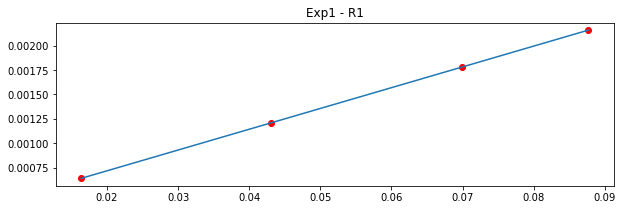

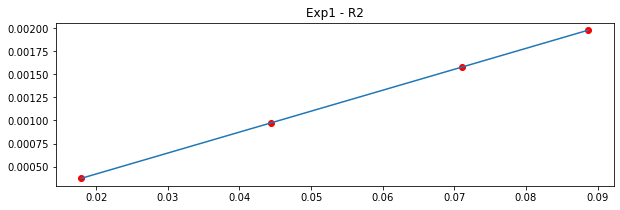

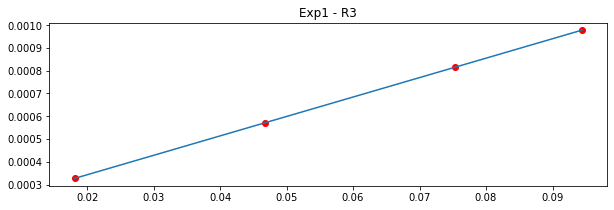

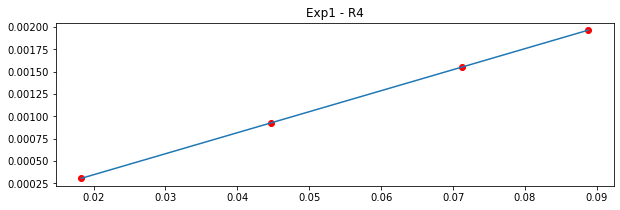

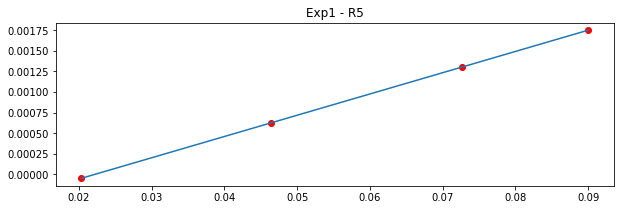

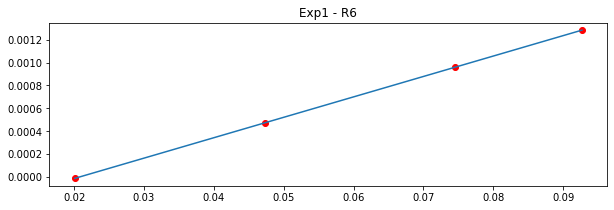

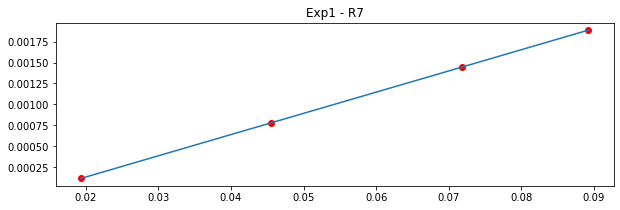

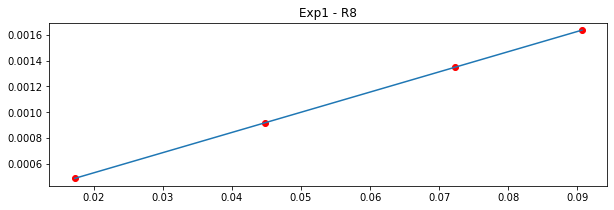

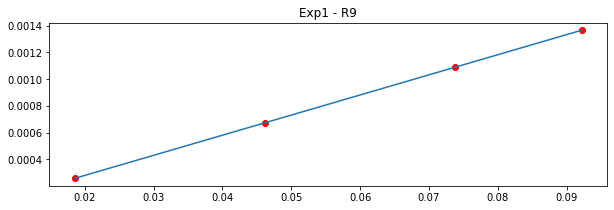

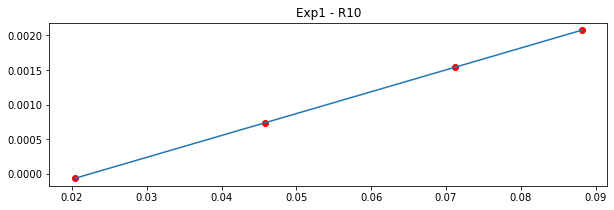

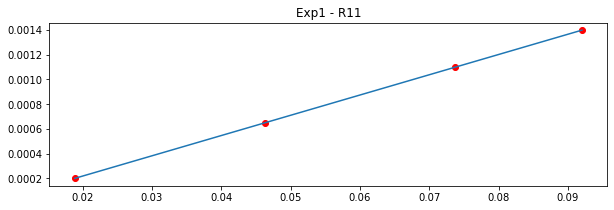

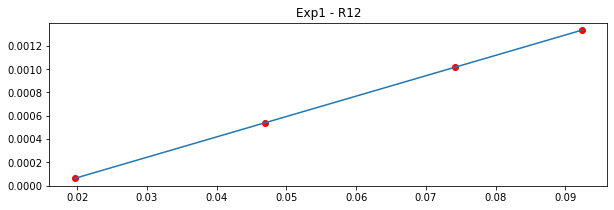

In [19]:
spka_data = spka.spka('[A]0')
spka.plot(spka_data)

In [34]:
#spka_data = spka.spka_best_fit(spka_data)
#spka.plot(spka_data)

### Perform RPKA

In [15]:
rpka = RPKA(spka_data, points_per_reaction)

'reagents.xlsx' could not be found, reagents will remain unnamed


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


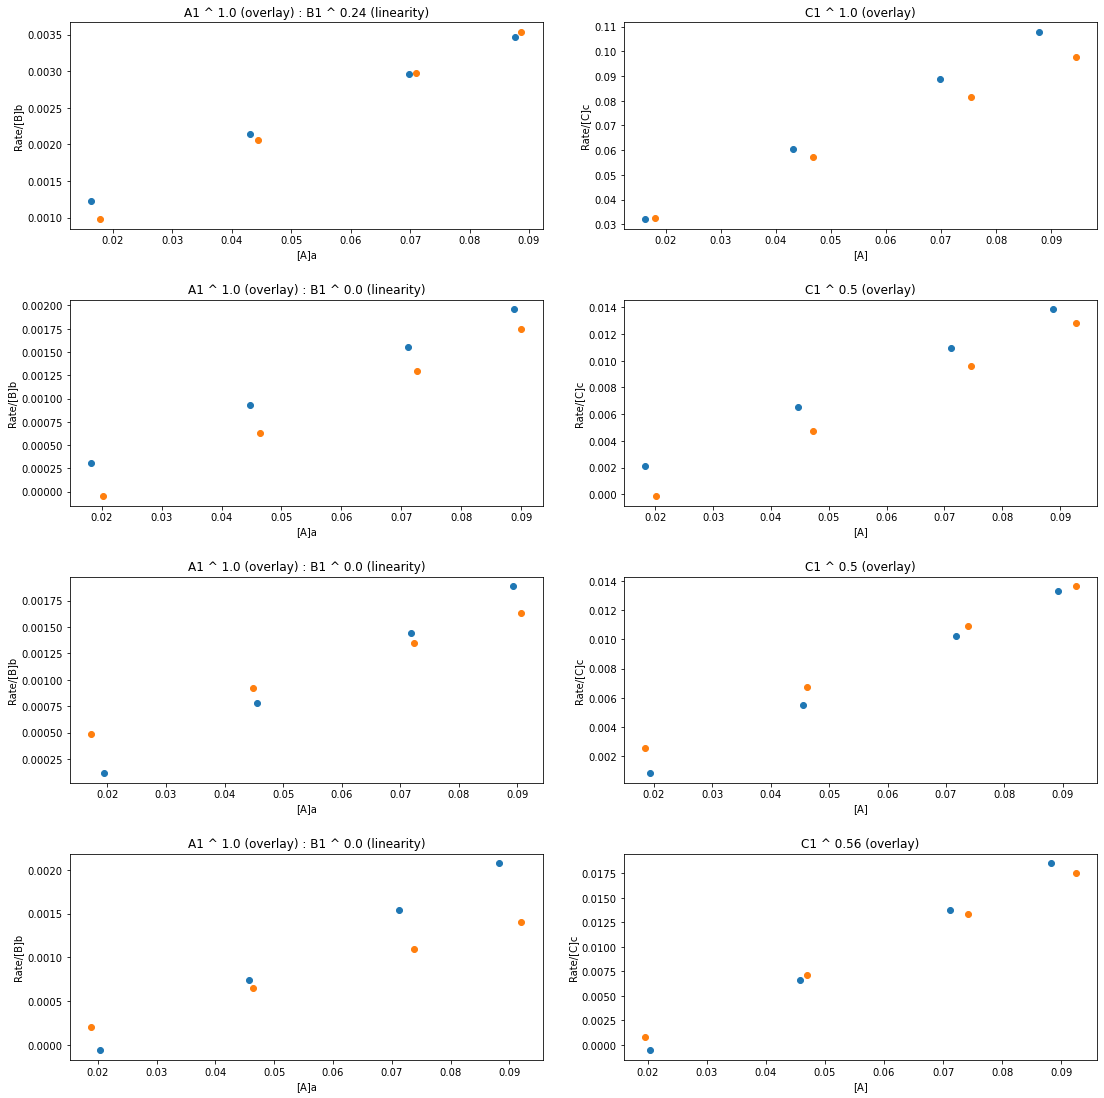

In [16]:
rpka_results = rpka.diff_excess('TNC', 0, 1, 1)
rpka.check_results(rpka_results)
#rpka_results

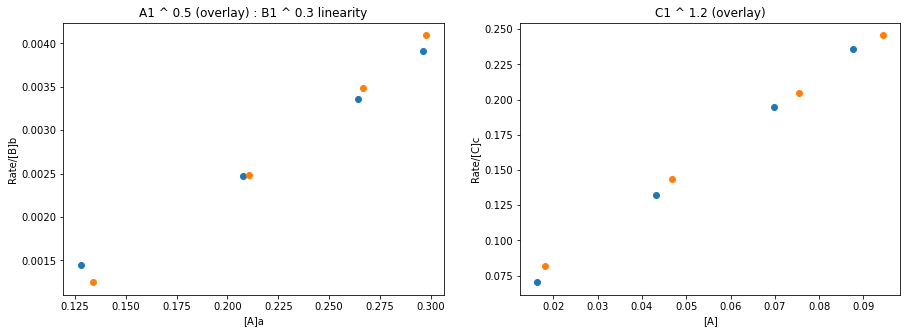

In [33]:
rpka.manual(0, .5, 0.3, 1.2)

In [ ]:
# Set up excelwriter
writer = pd.ExcelWriter(ir_data['Exp No'][0] + ' - ' +   # Adds experiment title - name of txt file
                        peak_of_interest[8:12] + ' - ' + # Adds the peak
                        processed_ir_data['Method'][0] + # Adds the methods used (prominence, area, etc)
                        '.xlsx', engine='xlsxwriter')
workbook=writer.book

# Output data
rpka_results.to_excel(writer, sheet_name='RPKA Data', startrow=0 , startcol=0, index=False)
spka_data.to_excel(writer, sheet_name='SPKA Data', startrow=0 , startcol=0, index=False)
ir_data.to_excel(writer, sheet_name='IR Data', startrow=0 , startcol=0, index=False)
processed_ir_data.to_excel(writer, sheet_name='Processed IR', startrow=0 , startcol=0, index=False)
experimental_data.to_excel(writer, sheet_name='Experimental Data', startrow=0 , startcol=0, index=False)
#conditions.to_excel(writer, sheet_name='Conditions', startrow=0 , startcol=0, index=False)

# Save
#writer.save()

# This won't work if the excel file is open

Ths is the fit_first function. The wrong way to do it, there is too much variation in the x axis. Ignore this code.

In [ ]:
	def linear_correction_fit_first(self, processed_ir_data, no_reactions, points_per_reaction):
		
		"""
		Fits the raw data to a straight line and returns data smoothed as this line.
		Scales the first point to the interval size, applies correction, then scales back.
		
		Parameter
		---------
		processed_ir_data: dataframe containing raw data, output from peak picking and processing
		no_reaction: number of reactions
		points_per_reaction: points per reaction, including t0
		
		Returns
		--------
		processed_ir_data: Dataframe with 'Peak Property' reaplaced with smoothed line
		"""
		
		rxn = processed_ir_data[['Relative Time','Peak Property']]

		df = []
		for var in range(0, no_reactions * points_per_reaction, points_per_reaction):
			
			# Is only +1 to remove the t0, all the other points are used
			x = rxn.iloc[var + 1 : points_per_reaction + var, 0]
			y = rxn.iloc[var + 1 : points_per_reaction + var, 1]
			
			# If we assume that each timepoint is at the same interval size, then we can adjust the time of the first point to make it fit if it is not (ie when initial_conv != interval_size)
			# Find the Interval size and Initial Conv from Conditions.xlsx
			conditions = pd.read_excel("Conditions.xlsx")
			interval_size = conditions['Interval Size'][0]
			initial_conv = conditions['Initial Conv'][0]
			
			# Time diff between first and second points
			time_diff = x.iloc[1] - x.iloc[0]

			# Scale the time diff
			time_diff_scaled = time_diff / initial_conv * interval_size

			# Ideal firt point relative to the second point
			first_point = x.iloc[1] - time_diff_scaled
			
			# Add it back in
			x_adjusted = x.copy()
			x_adjusted.iloc[0] = first_point
						
			# Find linear fit with the adjusted point
			a,b = np.polyfit(x_adjusted, y, 1)
			
			# Create the smoothed y data without the adjusted point
			best_fit_line = []
			best_fit_line = a * x + b
			
			# Add the t0 back in
			best_fit_line = pd.concat([pd.Series(rxn.iloc[var : var + 1, 1]), best_fit_line])
			
			# Append to list
			df.append(best_fit_line)
			
		linearised_data = pd.concat(df).reset_index(drop=True)

		# Save the raw data
		processed_ir_data['Raw Peak Property'] = processed_ir_data['Peak Property']
		
		# Overwrite raw data and add linear best fit to dataframe
		processed_ir_data['Peak Property'] = linearised_data
		
		return processed_ir_data

In [164]:
rxn = processed_ir_data[['Relative Time','Peak Property']]
#rxn

In [147]:
for var in range(0, no_reactions * points_per_reaction, points_per_reaction):
    print(var)

0
5
10
15
20
25
30
35
40
45
50
55


In [165]:
var = 45
# Is only +1 to remove the t0, all the other points are used
x = rxn.iloc[var + 1 : points_per_reaction + var, 0]
y = rxn.iloc[var + 1 : points_per_reaction + var, 1]

In [166]:
# Find the Interval size and Initial Conv from Conditions.xlsx
conditions = pd.read_excel("Conditions.xlsx")
interval_size = conditions['Interval Size'][0]
initial_conv = conditions['Initial Conv'][0]
print('int size ' + str(interval_size), ', init conv ' + str(initial_conv))

int size 30 , init conv 20


In [167]:
# If we assume that each timepoint is the same interval size, then we can adjust the time of the first point to make it fit

# Find the average time difference between each point - don't need this
av_diff = np.diff(x).mean()

In [168]:
x

46    559.933333
47    571.433333
48    582.933333
49    594.683333
Name: Relative Time, dtype: float64

In [169]:
# Time diff between first and second points
time_diff = x.iloc[1] - x.iloc[0]

# Scale the time diff
time_diff_scaled = time_diff / initial_conv * interval_size

# Ideal firt point relative to the second point
first_point = x.iloc[1] - time_diff_scaled
first_point

554.1833333333333

In [170]:
x_adjusted = x.copy()
x_adjusted.iloc[0] = first_point
x_adjusted

46    554.183333
47    571.433333
48    582.933333
49    594.683333
Name: Relative Time, dtype: float64

In [171]:
# Find linear fit with the adjusted point
a,b = np.polyfit(x_adjusted, y, 1)

In [172]:
# Create the smoothed y data without the adjusted point
best_fit_line = []
best_fit_line = a * x + b

In [173]:
best_fit_line

46    0.847779
47    0.660977
48    0.474175
49    0.283313
Name: Relative Time, dtype: float64

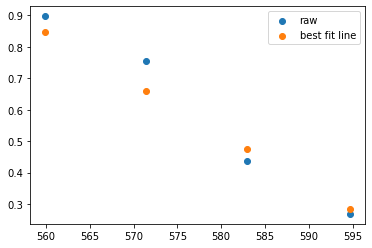

In [175]:
plt.scatter(x, y, label = 'raw')
#plt.scatter(x_adjusted, y, label = 'x_adj')
plt.scatter(x, best_fit_line, label = 'best fit line')
plt.legend()
plt.show()

In [160]:
pd.Series(rxn.iloc[var : var + 1, 1])

0    1.10078
Name: Peak Property, dtype: float64